# World Happiness Report
(https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021?select=world-happiness-report.csv)

Hola

In [123]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from pylab import * 
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

plt.rcParams["font.family"] = "Times New Roman"

In [4]:
# Import of the data
filepath = 'data/WHR.csv'
data = pd.read_csv(filepath, sep = ',')

### Brief description of the data set and a summary of its attributes

In [5]:
data.shape

(1949, 11)

In [6]:
data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


### I take a look to see if the data is skewed

In [8]:
float_cols = data.dtypes[data.dtypes == np.float]
float_cols_list = float_cols.index.tolist()
skew_limit = 0.75
data_skw = data[float_cols_list].skew()

# As we did in the class exercicise, we will skew the variables
skew_cols = (data_skw
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > 0.75'))
skew_cols

<ipython-input-8-96c7775e5982>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  float_cols = data.dtypes[data.dtypes == np.float]


,Skew
Generosity,0.807140
Social support,-1.110682
Perceptions of corruption,-1.496045


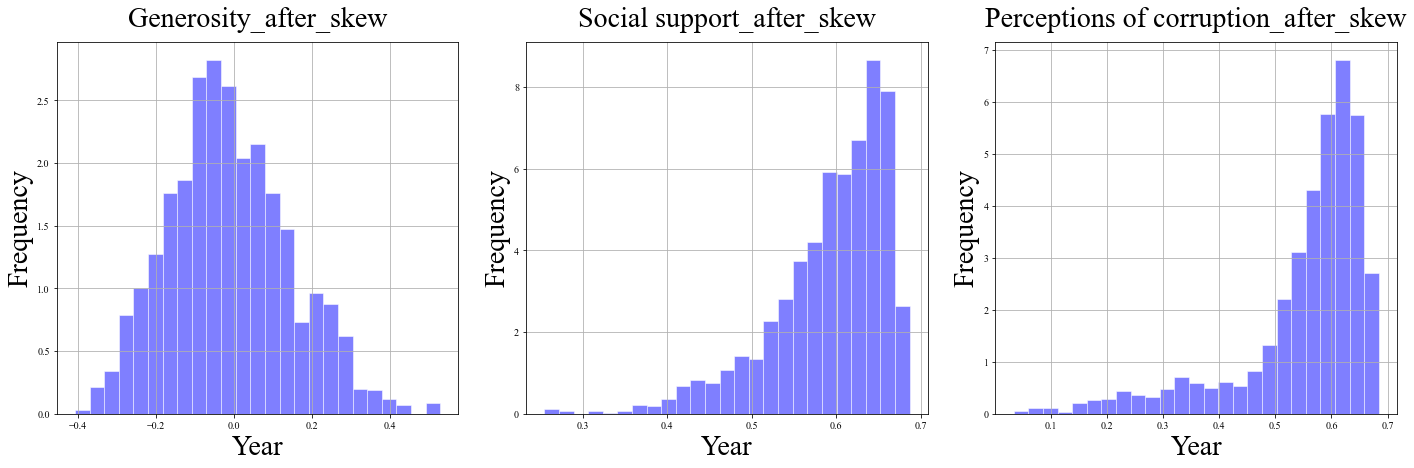

In [9]:
# Now we apply the log to these variables

skew_cols.index.values 

dataS = data.copy()
for col in skew_cols.index.values:
    dataS[col] = data[col].apply(np.log1p)
    
    
fig, axs = plt.subplots(1, 3, figsize = (20, 7))    

dataS['Generosity'].hist( ax = axs[0], bins= 25, alpha = 0.5, color = 'blue',density=True, edgecolor='white')
dataS['Social support'].hist( ax = axs[1], bins= 25, alpha = 0.5, color = 'blue',density=True, edgecolor='white')
dataS['Perceptions of corruption'].hist( ax = axs[2], bins= 25, alpha = 0.5, color = 'blue',density=True, edgecolor='white')

 
for i, ax in enumerate(axs.flat):
    ax.set_xlabel('Year').set_fontsize(28)
    ax.set_ylabel('Frequency').set_fontsize(28)

axs[0].set_title('Generosity_after_skew', pad=15).set_fontsize(28)
axs[1].set_title('Social support_after_skew', pad=15).set_fontsize(28)
axs[2].set_title('Perceptions of corruption_after_skew', pad=15).set_fontsize(28)

fig.tight_layout(pad=2.5)

plt.savefig('skew1.png', bbox_inches='tight')

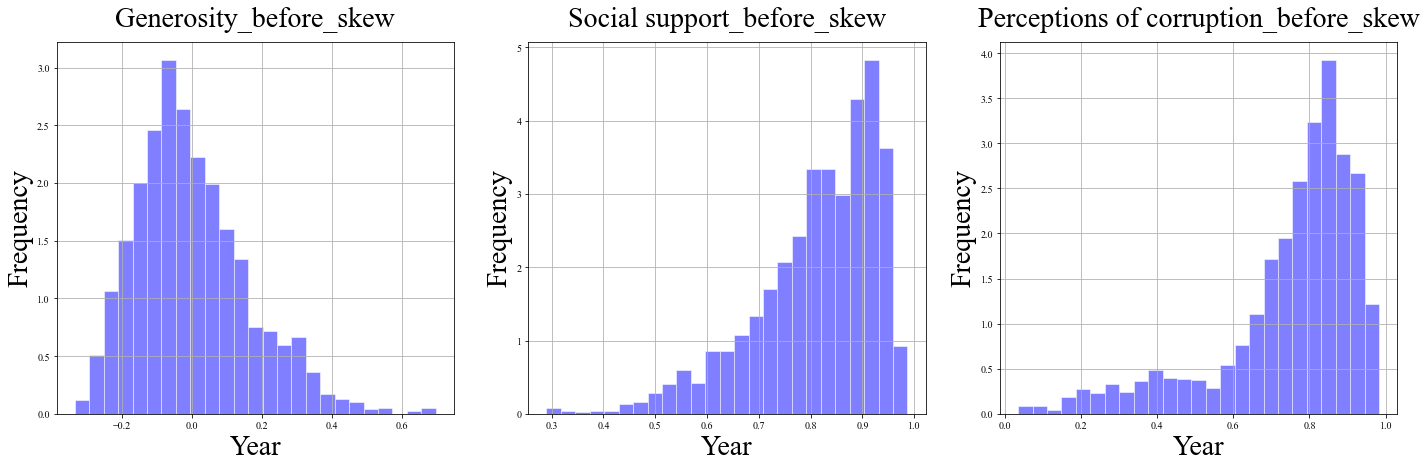

In [10]:
fig, axs = plt.subplots(1, 3, figsize = (20, 7))    

data['Generosity'].hist( ax = axs[0], bins= 25, alpha = 0.5, color = 'blue' ,density=True, edgecolor='white')
data['Social support'].hist( ax = axs[1], bins= 25, alpha = 0.5, color = 'blue',density=True, edgecolor='white')
data['Perceptions of corruption'].hist( ax = axs[2], bins= 25, alpha = 0.5, color = 'blue',density=True, edgecolor='white')

 
for i, ax in enumerate(axs.flat):
    ax.set_xlabel('Year').set_fontsize(28)
    ax.set_ylabel('Frequency').set_fontsize(28)

axs[0].set_title('Generosity_before_skew', pad=15).set_fontsize(28)
axs[1].set_title('Social support_before_skew', pad=15).set_fontsize(28)
axs[2].set_title('Perceptions of corruption_before_skew', pad=15).set_fontsize(28)

fig.tight_layout(pad=2.5)

plt.savefig('skew2.png', bbox_inches='tight')

In [11]:
dataS['Perceptions of corruption'].skew()

-1.7997769727364983

### Pairplot

In [13]:
df = data.copy()
df['Country Seg']=df['Country name']
df.loc[~df['Country Seg'].isin(['Burundi','Luxembourg', 'Mexico', 'Malawi', 'Australia', 'Bulgaria']),'Country Seg']='Other'

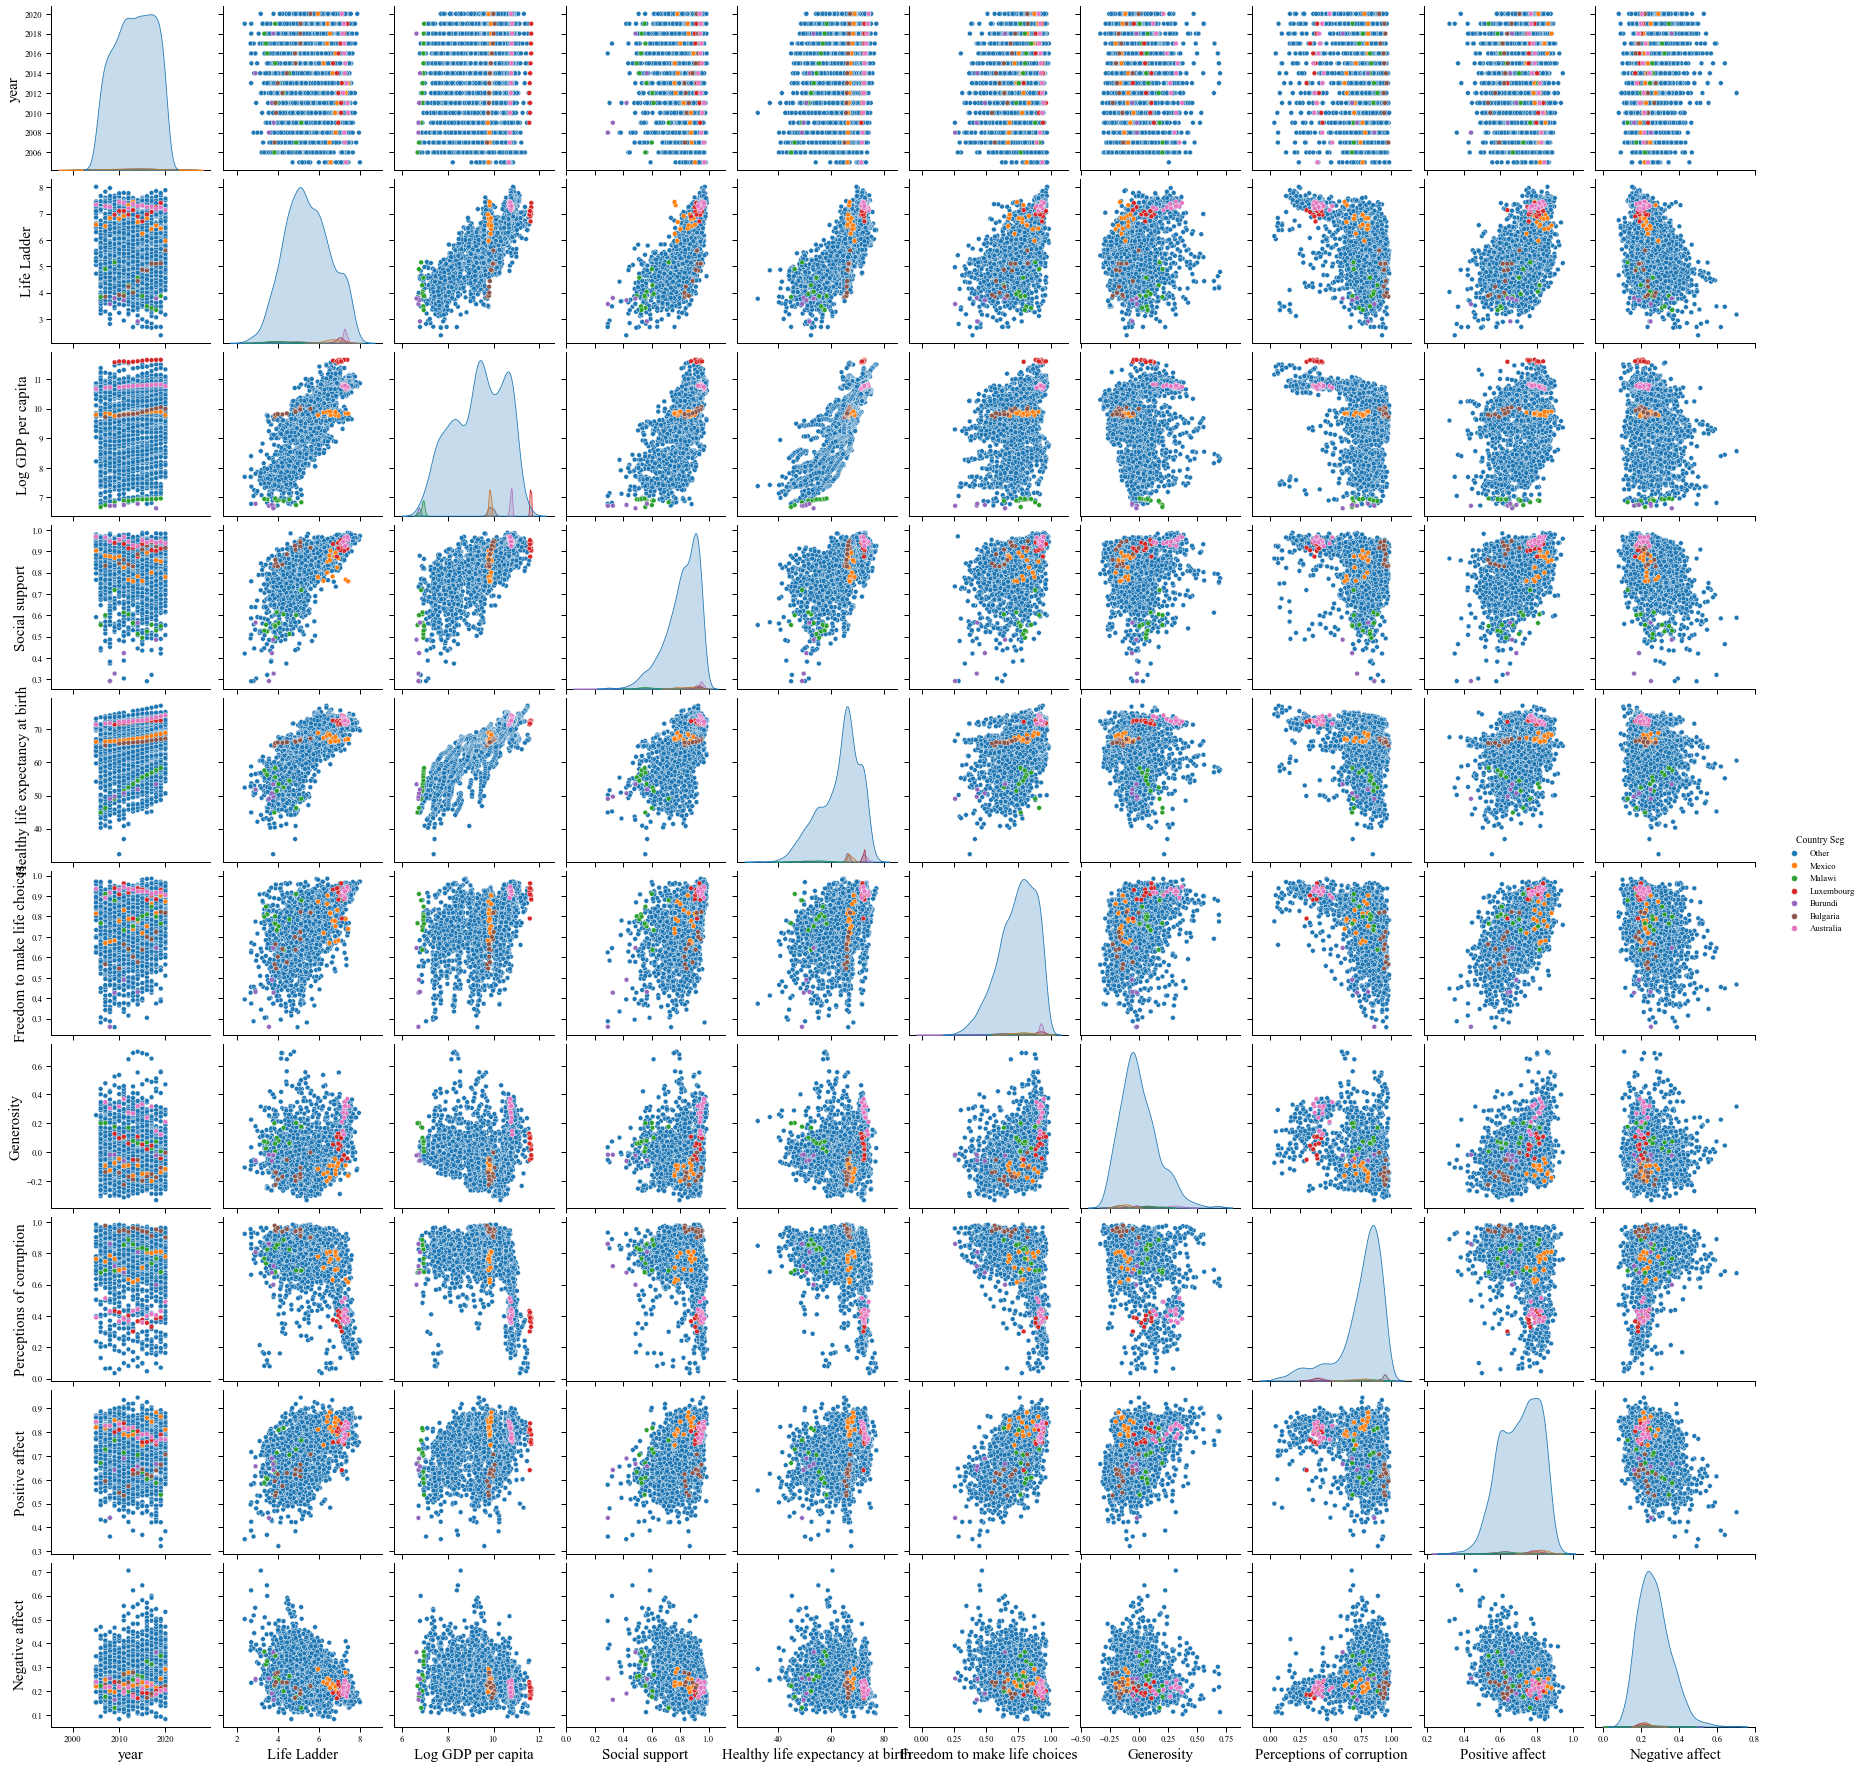

In [118]:
# PAIRPLOT SEGREGATED
fig.set_size_inches(70,35)
sns.set_context("paper", rc={"axes.labelsize":15})
ax = sns.pairplot(
    df.sort_values('Country Seg', ascending=False),
    hue='Country Seg'
    )

fig.legend(['Burundi','Luxembourg', 'Mexico', 'Malawi', 'Australia', 'Bulgaria'], bbox_to_anchor=(0., 1.0, 0, .102), loc='lower left',
           ncol=5, fontsize=35)
plt.savefig('PairPlot.png', bbox_inches='tight')

### Evolutions in time for all countries

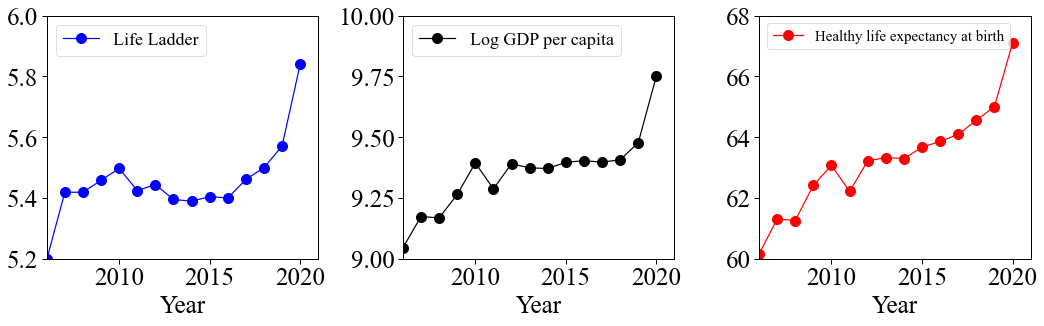

In [146]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,5))

data.groupby('year').mean().plot(y='Life Ladder', ax=ax1, color='blue', style='.-',  markersize=20)
ax1.axis([2006, 2021, 5.2, 6.0])
ax1.set_xlabel('Year').set_fontsize(25)

data.groupby('year').mean().plot(y='Log GDP per capita', ax=ax2, color='black', style='.-',  markersize=20)
ax2.axis([2006, 2021, 9.0, 10.0])
ax2.set_xlabel('Year').set_fontsize(25)

data.groupby('year').mean().plot(y='Healthy life expectancy at birth', ax=ax3, color='red', style='.-',  markersize=20)
ax3.axis([2006, 2021, 60, 68])
ax3.set_xlabel('Year').set_fontsize(25)

ax1.legend(loc=2, prop={'size': 18})
ax2.legend(loc=2, prop={'size': 18})
ax3.legend(loc=2, prop={'size': 15})

fig.tight_layout(pad=2.5)

plt.savefig('year.png', bbox_inches='tight')

### Evolutions segregated by countries

<ipython-input-115-9695bef12703>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  axs[0, 0].plot(dataAf['year'], dataAf['Life Ladder'], '-ok', color = 'blue', markersize=10)
<ipython-input-115-9695bef12703>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  axs[0, 0].plot(dataBu['year'], dataBu['Life Ladder'], '-ok', color = 'red', markersize=10)
<ipython-input-115-9695bef12703>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  axs[0, 0].plot(dataMa['year'], dataMa['Life Ladder'], '-ok', color = 'green', markersize=10)
<ipython-input-115-9695bef12703>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok

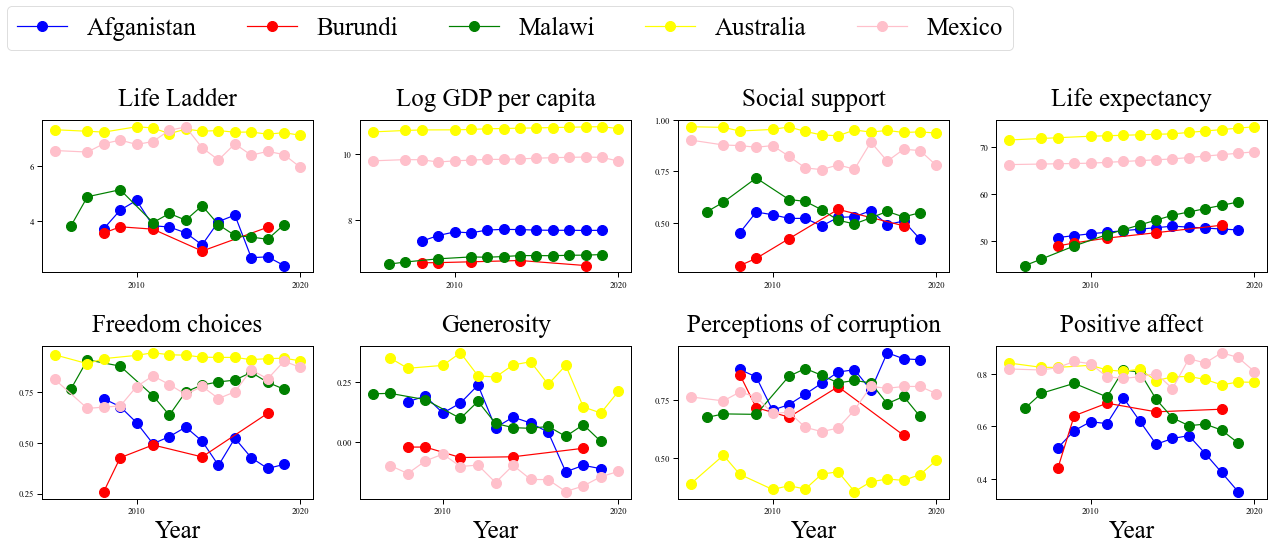

In [115]:
dataAf = data.loc[data['Country name'] == 'Afghanistan']
dataBu = data.loc[data['Country name'] == 'Burundi']
dataMa = data.loc[data['Country name'] == 'Malawi']
dataAu = data.loc[data['Country name'] == 'Australia']
dataMe = data.loc[data['Country name'] == 'Mexico']

fig, axs = plt.subplots(2, 4, figsize = (18,7))
axs[0, 0].plot(dataAf['year'], dataAf['Life Ladder'], '-ok', color = 'blue', markersize=10)
axs[0, 0].plot(dataBu['year'], dataBu['Life Ladder'], '-ok', color = 'red', markersize=10)
axs[0, 0].plot(dataMa['year'], dataMa['Life Ladder'], '-ok', color = 'green', markersize=10)
axs[0, 0].plot(dataAu['year'], dataAu['Life Ladder'], '-ok', color = 'yellow', markersize=10)
axs[0, 0].plot(dataMe['year'], dataMe['Life Ladder'], '-ok', color = 'pink', markersize=10)
axs[0, 0].set_title('Life Ladder', pad=15).set_fontsize(25)

axs[0, 1].plot(dataAf['year'], dataAf['Log GDP per capita'], '-ok', color = 'blue', markersize=10)
axs[0, 1].plot(dataBu['year'], dataBu['Log GDP per capita'], '-ok', color = 'red', markersize=10)
axs[0, 1].plot(dataMa['year'], dataMa['Log GDP per capita'], '-ok', color = 'green', markersize=10)
axs[0, 1].plot(dataAu['year'], dataAu['Log GDP per capita'], '-ok', color = 'yellow', markersize=10)
axs[0, 1].plot(dataMe['year'], dataMe['Log GDP per capita'], '-ok', color = 'pink', markersize=10)
axs[0, 1].set_title('Log GDP per capita', pad=15).set_fontsize(25)

axs[0, 2].plot(dataAf['year'], dataAf['Social support'], '-ok', color = 'blue', markersize=10)
axs[0, 2].plot(dataBu['year'], dataBu['Social support'], '-ok', color = 'red', markersize=10)
axs[0, 2].plot(dataMa['year'], dataMa['Social support'], '-ok', color = 'green', markersize=10)
axs[0, 2].plot(dataAu['year'], dataAu['Social support'], '-ok', color = 'yellow', markersize=10)
axs[0, 2].plot(dataMe['year'], dataMe['Social support'], '-ok', color = 'pink', markersize=10)
axs[0, 2].set_title('Social support', pad=15).set_fontsize(25)

axs[0, 3].plot(dataAf['year'], dataAf['Healthy life expectancy at birth'], '-ok', color = 'blue', markersize=10)
axs[0, 3].plot(dataBu['year'], dataBu['Healthy life expectancy at birth'], '-ok', color = 'red', markersize=10)
axs[0, 3].plot(dataMa['year'], dataMa['Healthy life expectancy at birth'], '-ok', color = 'green', markersize=10)
axs[0, 3].plot(dataAu['year'], dataAu['Healthy life expectancy at birth'], '-ok', color = 'yellow', markersize=10)
axs[0, 3].plot(dataMe['year'], dataMe['Healthy life expectancy at birth'], '-ok', color = 'pink', markersize=10)
axs[0, 3].set_title('Life expectancy', pad=15).set_fontsize(25)

axs[1, 0].plot(dataAf['year'], dataAf['Freedom to make life choices'], '-ok', color = 'blue', markersize=10)
axs[1, 0].plot(dataBu['year'], dataBu['Freedom to make life choices'], '-ok', color = 'red', markersize=10)
axs[1, 0].plot(dataMa['year'], dataMa['Freedom to make life choices'], '-ok', color = 'green', markersize=10)
axs[1, 0].plot(dataAu['year'], dataAu['Freedom to make life choices'], '-ok', color = 'yellow', markersize=10)
axs[1, 0].plot(dataMe['year'], dataMe['Freedom to make life choices'], '-ok', color = 'pink', markersize=10)
axs[1, 0].set_title('Freedom choices', pad=15).set_fontsize(25)

axs[1, 1].plot(dataAf['year'], dataAf['Generosity'], '-ok', color = 'blue', markersize=10)
axs[1, 1].plot(dataBu['year'], dataBu['Generosity'], '-ok', color = 'red', markersize=10)
axs[1, 1].plot(dataMa['year'], dataMa['Generosity'], '-ok', color = 'green', markersize=10)
axs[1, 1].plot(dataAu['year'], dataAu['Generosity'], '-ok', color = 'yellow', markersize=10)
axs[1, 1].plot(dataMe['year'], dataMe['Generosity'], '-ok', color = 'pink', markersize=10)
axs[1, 1].set_title('Generosity', pad=15).set_fontsize(25)

axs[1, 2].plot(dataAf['year'], dataAf['Perceptions of corruption'], '-ok', color = 'blue', markersize=10)
axs[1, 2].plot(dataBu['year'], dataBu['Perceptions of corruption'], '-ok', color = 'red', markersize=10)
axs[1, 2].plot(dataMa['year'], dataMa['Perceptions of corruption'], '-ok', color = 'green', markersize=10)
axs[1, 2].plot(dataAu['year'], dataAu['Perceptions of corruption'], '-ok', color = 'yellow', markersize=10)
axs[1, 2].plot(dataMe['year'], dataMe['Perceptions of corruption'], '-ok', color = 'pink', markersize=10)
axs[1, 2].set_title('Perceptions of corruption', pad=15).set_fontsize(25)

axs[1, 3].plot(dataAf['year'], dataAf['Positive affect'], '-ok', color = 'blue', markersize=10)
axs[1, 3].plot(dataBu['year'], dataBu['Positive affect'], '-ok', color = 'red', markersize=10)
axs[1, 3].plot(dataMa['year'], dataMa['Positive affect'], '-ok', color = 'green', markersize=10)
axs[1, 3].plot(dataAu['year'], dataAu['Positive affect'], '-ok', color = 'yellow', markersize=10)
axs[1, 3].plot(dataMe['year'], dataMe['Positive affect'], '-ok', color = 'pink', markersize=10)
axs[1, 3].set_title('Positive affect', pad=15).set_fontsize(25)



 
for ax in axs.flat:
    if ax.is_last_row():
        ax.set_xlabel('Year').set_fontsize(25)
        

plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25) 

fig.legend(['Afganistan', 'Burundi', 'Malawi', 'Australia', 'Mexico'], bbox_to_anchor=(0., 1.0, 0, .102), loc='lower left',
           ncol=5, fontsize=25)
fig.tight_layout(pad=2.5)

plt.savefig('FeatureEvo.png', bbox_inches='tight')


### Hypotesis

First of all we install geopandas to finally get extra data to do our hypotesis


In [18]:
import geopandas as gpd

In [19]:
countriesDF=gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

In [20]:
#countriesDF.plot('gdp_md_est', legend=True, figsize=(15,10))

In [21]:
countriesDF['latitude']=countriesDF.geometry.centroid.y
countriesDF['longitude']=countriesDF.geometry.centroid.x

<ipython-input-21-8d19c820a15b>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countriesDF['latitude']=countriesDF.geometry.centroid.y
<ipython-input-21-8d19c820a15b>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countriesDF['longitude']=countriesDF.geometry.centroid.x


In [22]:
#countriesDF.plot('latitude', legend=True, figsize=(14,10))

In [23]:
# We change some names from the original data to fit the names of he countries data frame
# from geopandas. There are still some countries left
data.loc[data['Country name']=='United States','Country name']='United States of America'
data.loc[data['Country name']=='Congo (Kinshasa)', 'Country name']='Dem. Rep. Congo'

In [24]:
# in Here we merge both data frames. there will be some countries without latitude and longitude
# data.
dataextraDF=(gpd.GeoDataFrame(
     data
    .merge(
        countriesDF[['name','latitude', 'continent','pop_est','geometry']],
        left_on='Country name',
        right_on='name',
        how='inner')#left
    .drop(columns='name')
    ))

In [25]:
# dataextraDF.plot(figsize=(10,10))

#### Hypothesis 1: Does Life Ladder depend on latitude?

- H0 : It does NOT depend on latitude
- H1: It does depend on latitude

Let's do first a scatter plot

In [54]:
dataextraDF.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1766 entries, 0 to 1765
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Country name                      1766 non-null   object  
 1   year                              1766 non-null   int64   
 2   Life Ladder                       1766 non-null   float64 
 3   Log GDP per capita                1752 non-null   float64 
 4   Social support                    1754 non-null   float64 
 5   Healthy life expectancy at birth  1752 non-null   float64 
 6   Freedom to make life choices      1735 non-null   float64 
 7   Generosity                        1704 non-null   float64 
 8   Perceptions of corruption         1670 non-null   float64 
 9   Positive affect                   1746 non-null   float64 
 10  Negative affect                   1752 non-null   float64 
 11  latitude                          1766 non-null 

In [143]:
dataextra = dataextraDF.copy()
dataextra.loc[dataextra['latitude']<0, 'latitude'] = abs(dataextra['latitude'])
dataextra.latitude.min()

0.5959662521769523

                            OLS Regression Results                            
Dep. Variable:            Life Ladder   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     518.1
Date:                Wed, 28 Apr 2021   Prob (F-statistic):          9.09e-101
Time:                        17:16:16   Log-Likelihood:                -2496.1
No. Observations:                1766   AIC:                             4996.
Df Residuals:                    1764   BIC:                             5007.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5606      0.047     97.657      0.0

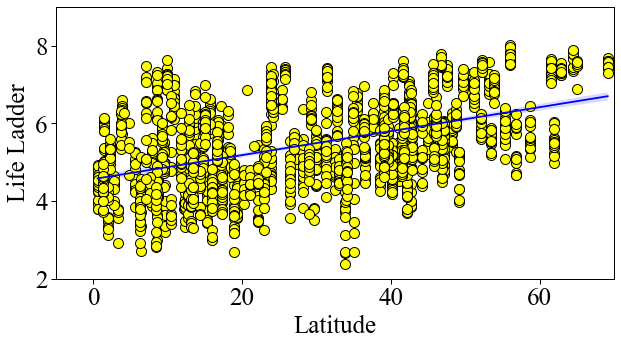

In [144]:
ax = plt.figure(figsize=(10, 5))
plt.plot(dataextra['latitude'], dataextra['Life Ladder'], 'o', color = 'yellow', 
         markeredgecolor='black', markersize=10)

sns.regplot(x="latitude", y="Life Ladder", data=dataextra, color = 'blue')


plt.xlabel('Latitude', fontsize=25)
plt.ylabel('Life Ladder', fontsize=25)
plt.axis([-5, 70, 2, 9])

plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25) 

plt.savefig('Ladderlatitude.png', bbox_inches='tight')

X2 = sm.add_constant(dataextra['latitude'])
est = sm.OLS(dataextra['Life Ladder'], X2)
est2 = est.fit()
print(est2.summary())

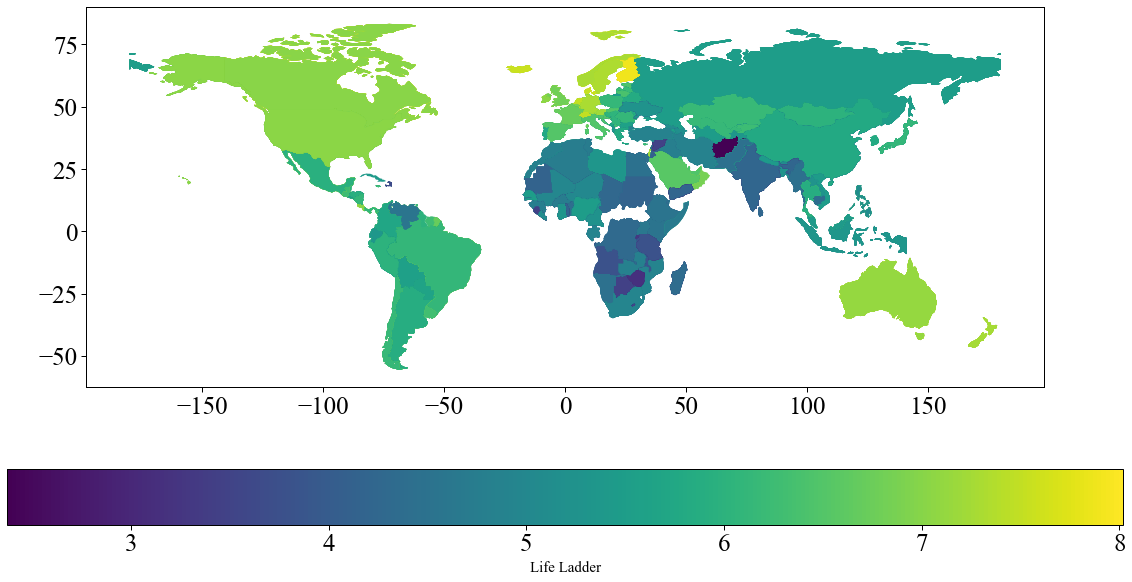

In [145]:
dataextra.plot('Life Ladder', legend=True, legend_kwds={'label': "Life Ladder", 'orientation': "horizontal"}, figsize=(20,10))
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25) 
plt.savefig('LifeLadder.png', bbox_inches='tight')


Let's do the same for another variable


#### Hypothesis 2: Does Social support depend on GDP?



In [67]:
dataextra2 = dataextraDF.copy()
dataextra2.dropna(axis=1)
dataextra2=dataextra2.loc[(dataextra2['Social support'].notnull()) & (dataextra2['Log GDP per capita'].notnull())]
dataextra2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1740 entries, 0 to 1765
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Country name                      1740 non-null   object  
 1   year                              1740 non-null   int64   
 2   Life Ladder                       1740 non-null   float64 
 3   Log GDP per capita                1740 non-null   float64 
 4   Social support                    1740 non-null   float64 
 5   Healthy life expectancy at birth  1727 non-null   float64 
 6   Freedom to make life choices      1714 non-null   float64 
 7   Generosity                        1696 non-null   float64 
 8   Perceptions of corruption         1651 non-null   float64 
 9   Positive affect                   1730 non-null   float64 
 10  Negative affect                   1735 non-null   float64 
 11  latitude                          1740 non-null 

                            OLS Regression Results                            
Dep. Variable:     Log GDP per capita   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     1550.
Date:                Wed, 28 Apr 2021   Prob (F-statistic):          7.09e-243
Time:                        11:27:09   Log-Likelihood:                -2157.4
No. Observations:                1740   AIC:                             4319.
Df Residuals:                    1738   BIC:                             4330.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.9047      0.139     28.

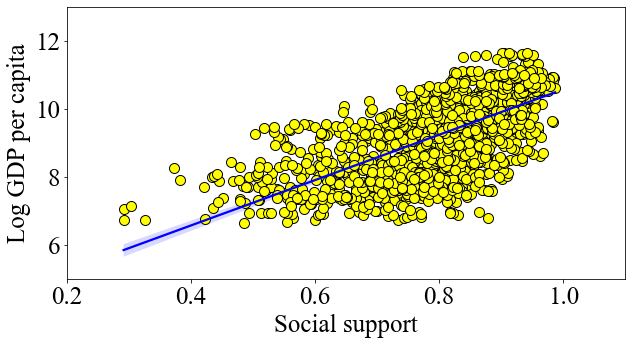

In [77]:
ax = plt.figure(figsize=(10, 5))
plt.plot(dataextra2['Social support'], dataextra2['Log GDP per capita'], 'o', color = 'yellow', 
         markeredgecolor='black', markersize=10)


sns.regplot(x="Social support", y="Log GDP per capita", data=dataextra2, color = 'blue')


plt.xlabel('Social support', fontsize=25)
plt.ylabel('Log GDP per capita', fontsize=25)
plt.axis([0.2, 1.1, 5, 13])

plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25) 


plt.savefig('GDPsocial.png', bbox_inches='tight')

X2 = sm.add_constant(dataextra2['Social support'])
est = sm.OLS(dataextra2['Log GDP per capita'], X2)
est2 = est.fit()
print(est2.summary())

#### Hypothesis 2: Does Healthy Life depend on latitude?

We once again do not take into accpunt the null values

In [147]:
dataextra3 = dataextraDF.copy()
#dataextra3 = dataextra3.loc[dataextra3['latitude']>=0]
dataextra3.loc[dataextra3['latitude']<0, 'latitude'] = abs(dataextra3['latitude'])

dataextra3=dataextra3.loc[(dataextra3['latitude'].notnull()) & (dataextra3['Healthy life expectancy at birth'].notnull())]


# only latitudes above 0

dataextra3.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1752 entries, 0 to 1765
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Country name                      1752 non-null   object  
 1   year                              1752 non-null   int64   
 2   Life Ladder                       1752 non-null   float64 
 3   Log GDP per capita                1739 non-null   float64 
 4   Social support                    1740 non-null   float64 
 5   Healthy life expectancy at birth  1752 non-null   float64 
 6   Freedom to make life choices      1722 non-null   float64 
 7   Generosity                        1691 non-null   float64 
 8   Perceptions of corruption         1656 non-null   float64 
 9   Positive affect                   1733 non-null   float64 
 10  Negative affect                   1738 non-null   float64 
 11  latitude                          1752 non-null 

                                   OLS Regression Results                                   
Dep. Variable:     Healthy life expectancy at birth   R-squared:                       0.330
Model:                                          OLS   Adj. R-squared:                  0.329
Method:                               Least Squares   F-statistic:                     860.8
Date:                              Wed, 28 Apr 2021   Prob (F-statistic):          3.15e-154
Time:                                      18:07:13   Log-Likelihood:                -5646.7
No. Observations:                              1752   AIC:                         1.130e+04
Df Residuals:                                  1750   BIC:                         1.131e+04
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

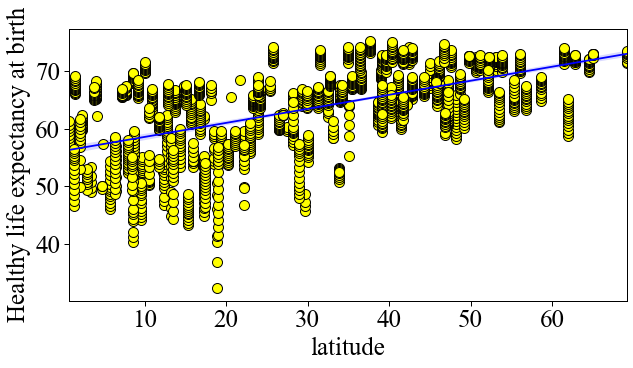

In [148]:
ax = plt.figure(figsize=(10, 5))
plt.plot(dataextra3['latitude'], dataextra3['Healthy life expectancy at birth'], 'o', color = 'yellow', 
         markeredgecolor='black', markersize=10)


sns.regplot(x="latitude", y="Healthy life expectancy at birth", data=dataextra3, color = 'blue')


plt.xlabel('latitude', fontsize=25)
plt.ylabel('Healthy life expectancy at birth', fontsize=25)
#plt.axis([-50, 80, 0, 1.05])

plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25) 


plt.savefig('LifeexpLatitude.png', bbox_inches='tight')

X2 = sm.add_constant(dataextra3['latitude'])
est = sm.OLS(dataextra3['Healthy life expectancy at birth'], X2)
est2 = est.fit()
print(est2.summary())

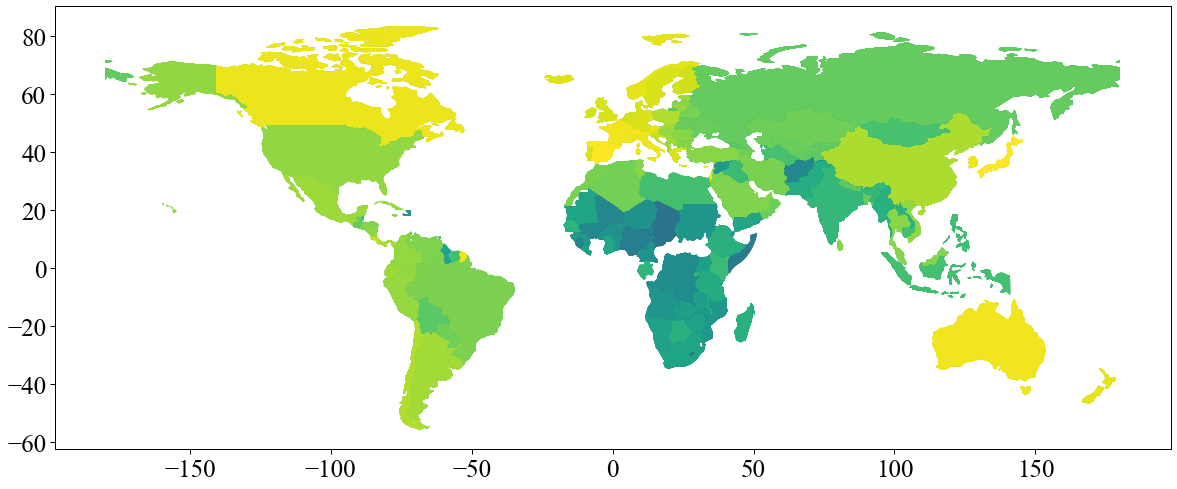

In [149]:
dataextra.plot('Healthy life expectancy at birth', legend=False, figsize=(20,20))
plt.savefig('LifeMap.png', bbox_inches='tight')